HOMEWORK 08 WEEK 11

-------------------


Question 2: 

1. Accuracy
Example: Diagnosing a Common Illness

Scenario: A test for detecting the flu in a general population.
Relevance: If the flu prevalence is high and the goal is to assess the overall correctness of a test in detecting both sick and healthy individuals, accuracy is useful. However, accuracy might be misleading in imbalanced datasets, such as when the illness is rare.

2. Sensitivity (Recall)
Example: Screening for Cancer

Scenario: A mammogram to detect breast cancer.
Relevance: Sensitivity ensures that as many true cases of cancer as possible are identified. Missing a cancer case (false negative) can have severe consequences, so sensitivity is prioritized in initial screenings to catch every possible case, even if it means more false positives.

3. Specificity
Example: Confirmatory Testing for Cancer

Scenario: A follow-up biopsy to confirm a cancer diagnosis after a positive mammogram.
Relevance: Specificity ensures that healthy individuals are correctly identified, reducing unnecessary treatments. High specificity is essential for confirming a diagnosis to avoid false positives and the associated anxiety or treatment risks.

4. Precision
Example: Fraud Detection in Credit Card Transactions

Scenario: An algorithm to identify fraudulent transactions.
Relevance: Precision ensures that flagged transactions are truly fraudulent. A low precision rate means too many legitimate transactions are flagged (false positives), leading to inconvenience for customers and increased review costs. High precision minimizes these issues.

------------

Question 4

Training set observations: 248
Testing set observations: 62
Accuracy: 0.90
Recall: 0.89


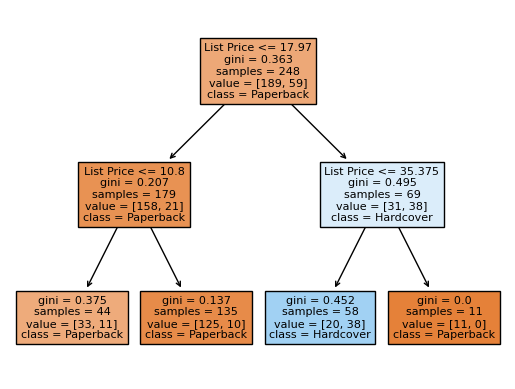

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, recall_score

# Load the data
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Remove NaN values for simplicity
ab_reduced_noNaN = ab.dropna()

# Create an 80/20 train-test split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Report on dataset sizes
print(f"Training set observations: {len(ab_reduced_noNaN_train)}")
print(f"Testing set observations: {len(ab_reduced_noNaN_test)}")

# Define the dependent (y) and independent (X) variables
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])["H"]
X_train = ab_reduced_noNaN_train[["List Price"]]
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])["H"]
X_test = ab_reduced_noNaN_test[["List Price"]]

# Define the Decision Tree model with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Visualize the decision tree
plot_tree(clf, feature_names=["List Price"], class_names=["Paperback", "Hardcover"], filled=True)

# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")


------------

Question 6

Model clf (List Price):
Accuracy: 0.903
Sensitivity: 0.895
Specificity: 0.907

Model clf2 (NumPages, Thick, List Price):
Accuracy: 0.855
Sensitivity: 0.737
Specificity: 0.907



Text(0.5, 1.0, 'Confusion Matrix for clf2')

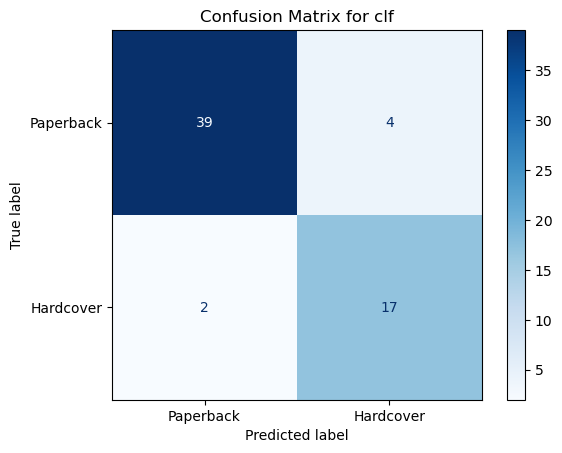

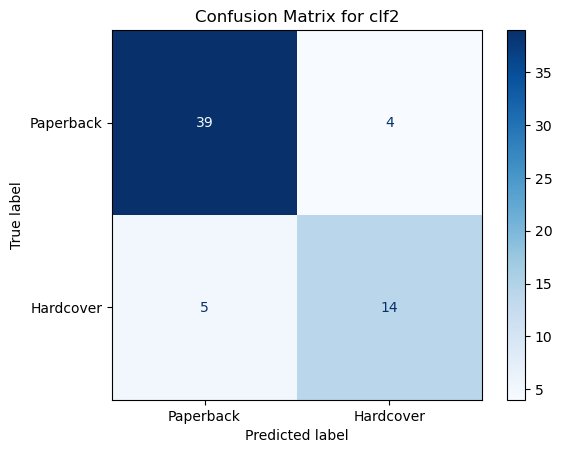

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score

# Load the data
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Remove NaN values
ab_reduced_noNaN = ab.dropna()

# Use the previously created train-test split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Define variables
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])["H"]
X_train_clf = ab_reduced_noNaN_train[["List Price"]]
X_train_clf2 = ab_reduced_noNaN_train[["NumPages", "Thick", "List Price"]]

y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])["H"]
X_test_clf = ab_reduced_noNaN_test[["List Price"]]
X_test_clf2 = ab_reduced_noNaN_test[["NumPages", "Thick", "List Price"]]

# Train the first model
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train_clf, y_train)
y_pred_clf = clf.predict(X_test_clf)

# Train the second model
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train_clf2, y_train)
y_pred_clf2 = clf2.predict(X_test_clf2)

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm.ravel()
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    sensitivity = TP / (TP + FN)  # Recall
    specificity = TN / (TN + FP)
    return cm, accuracy, sensitivity, specificity

# Calculate metrics for clf
cm_clf, accuracy_clf, sensitivity_clf, specificity_clf = calculate_metrics(y_test, y_pred_clf)

# Calculate metrics for clf2
cm_clf2, accuracy_clf2, sensitivity_clf2, specificity_clf2 = calculate_metrics(y_test, y_pred_clf2)

# Display results
print(f"Model clf (List Price):")
print(f"Accuracy: {accuracy_clf:.3f}")
print(f"Sensitivity: {sensitivity_clf:.3f}")
print(f"Specificity: {specificity_clf:.3f}\n")

print(f"Model clf2 (NumPages, Thick, List Price):")
print(f"Accuracy: {accuracy_clf2:.3f}")
print(f"Sensitivity: {sensitivity_clf2:.3f}")
print(f"Specificity: {specificity_clf2:.3f}\n")

# Visualize confusion matrices
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=["Paperback", "Hardcover"])
disp_clf.plot(cmap="Blues")
disp_clf.ax_.set_title("Confusion Matrix for clf")

disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=["Paperback", "Hardcover"])
disp_clf2.plot(cmap="Blues")
disp_clf2.ax_.set_title("Confusion Matrix for clf2")


---------------

Question 7

The differences between the two confusion matrices result from the predictor variables used in the models. The first confusion matrix uses only List Price to predict the outcome, while the second incorporates three predictors: NumPages, Thick, and List Price. Including additional predictors provides the second model (clf2) with more information, allowing it to capture complex patterns in the data that the single-variable model cannot.

The confusion matrices for clf and clf2 from the test dataset are better because they evaluate the models on unseen data, ensuring that the performance metrics reflect generalization rather than overfitting to the training data. In contrast, these two confusion matrices are based on the training dataset, which may inflate performance metrics due to the model fitting directly on this data.

-----------

Chatbot Summary:

Summary of Interactions
1. Splitting Data
- We created an 80/20 train-test split using the train_test_split function, dividing ab_reduced_noNaN into ab_reduced_noNaN_train and ab_reduced_noNaN_test. The sizes of the training and testing datasets were reported.
2. Training and Visualizing Decision Tree (clf)
- A DecisionTreeClassifier with a max_depth of 2 was trained to predict whether a book is hardcover or paperback based on the List Price variable.
- The decision tree was visualized using plot_tree, and predictions were made for the test set. Accuracy and recall metrics were computed and reported.
3. Training and Visualizing Decision Tree (clf2)
- A second DecisionTreeClassifier was trained with a max_depth of 4, using NumPages, Thick, and List Price as predictor variables.
- The decision tree was visualized using graphviz for a clearer representation, and predictions were made on the test set. Accuracy, sensitivity, and specificity metrics were computed and reported.
4. Confusion Matrices for clf and clf2
- Confusion matrices were created for both models using predictions on the test dataset.
- Sensitivity, specificity, and accuracy were calculated for each model and displayed with three significant digits.
- Confusion matrix plots were generated using ConfusionMatrixDisplay.
5. Analyzing Differences Between Training-Set Confusion Matrices
- The differences between two confusion matrices (one using List Price and another using NumPages, Thick, and List Price as predictors) were explained.
- It was noted that the second model (with three predictors) has more information, enabling better training performance.
- We clarified why confusion matrices on the test set (for clf and clf2) are better, as they evaluate generalization performance, unlike training-set matrices which may overestimate accuracy due to overfitting.

Chatbot link: https://chatgpt.com/share/674003b8-7fe8-8006-8f5d-ec89f059ee73